In [ ]:
pip install tensorflow matplotlib


1/1 [==============================] - 1s 569ms/step


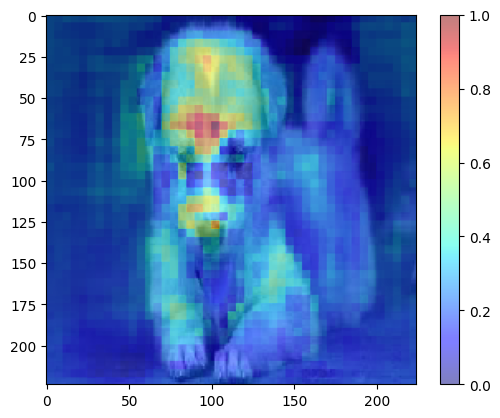

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the image
def load_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Occlusion analysis function
def occlusion_analysis(model, img, patch_size, stride):
    img_height, img_width, _ = img.shape[1:]
    heatmap = np.zeros((img_height, img_width))

    original_prediction = model.predict(img)
    original_class = np.argmax(original_prediction[0])

    for y in range(0, img_height, stride):
        for x in range(0, img_width, stride):
            occluded_img = img.copy()
            occluded_img[:, y:y+patch_size, x:x+patch_size, :] = 0  # Occlude with zeros
            occluded_prediction = model.predict(occluded_img)
            heatmap[y:y+patch_size, x:x+patch_size] = original_prediction[0][original_class] - occluded_prediction[0][original_class]

    return heatmap

# Main execution
img_path = '/content/DOG.jpeg'
model = VGG16(weights='imagenet')
img = load_image(img_path, target_size=(224, 224))

# Parameters for occlusion
patch_size = 10
stride = 5

# Perform occlusion analysis
heatmap = occlusion_analysis(model, img, patch_size, stride)

# Normalize heatmap for visualization
heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))

# Display heatmap
plt.imshow(image.array_to_img(img[0]))
plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap
plt.colorbar()
plt.show()
